<a href="https://colab.research.google.com/github/donaann84/PROJECT/blob/main/Main_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, classification_report, confusion_matrix
)
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

In [100]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/donaann84/PROJECT/refs/heads/main/gym_members_exercise_tracking_synthetic_data.csv')
df.head()

print("Dataset Shape:", df.shape)
df.info()

Dataset Shape: (1800, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1790 non-null   float64
 1   Gender                         1729 non-null   object 
 2   Weight (kg)                    1778 non-null   float64
 3   Height (m)                     1774 non-null   float64
 4   Max_BPM                        1779 non-null   object 
 5   Avg_BPM                        1770 non-null   float64
 6   Resting_BPM                    1781 non-null   float64
 7   Session_Duration (hours)       1777 non-null   float64
 8   Calories_Burned                1777 non-null   float64
 9   Workout_Type                   1739 non-null   object 
 10  Fat_Percentage                 1784 non-null   float64
 11  Water_Intake (liters)          1776 non-null   float64
 12  Workout_Frequency (day

In [101]:
# Checking for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Age                              10
Gender                           71
Weight (kg)                      22
Height (m)                       26
Max_BPM                          21
Avg_BPM                          30
Resting_BPM                      19
Session_Duration (hours)         23
Calories_Burned                  23
Workout_Type                     61
Fat_Percentage                   16
Water_Intake (liters)            24
Workout_Frequency (days/week)    58
Experience_Level                 57
BMI                              30
dtype: int64


In [102]:
# Convert Max_BPM to numeric (object → float)
df['Max_BPM'] = pd.to_numeric(df['Max_BPM'], errors='coerce')

# Impute missing numerical columns with median
numerical_cols = df.select_dtypes(include=['float64']).columns
df[numerical_cols] = df[numerical_cols].apply(lambda col: col.fillna(col.median()))

# Impute categorical columns with mode
categorical_cols = ['Gender', 'Workout_Type']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Check for any remaining missing values
print("Remaining missing values:\n", df.isnull().sum().sort_values(ascending=False).head())

Remaining missing values:
 Age            0
Gender         0
Weight (kg)    0
Height (m)     0
Max_BPM        0
dtype: int64


In [103]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,34.467222,67.578444,1.739100,180.245000,146.255000,63.962222,1.391322,1033.651667,23.516389,2.707889,3.328333,1.829444,19.936644
std,12.281940,19.741219,0.122998,11.384311,15.092119,7.895208,0.369962,325.946144,5.839887,0.705552,0.934472,0.735293,6.520159
min,18.000000,40.000000,1.500000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,23.750000,52.575000,1.660000,170.000000,134.000000,57.000000,1.140000,800.000000,20.500000,2.100000,3.000000,1.000000,14.860000
50%,33.000000,65.300000,1.730000,181.000000,146.000000,65.000000,1.370000,1030.000000,24.300000,2.800000,3.000000,2.000000,18.690000
75%,45.000000,80.000000,1.820000,190.000000,159.000000,72.000000,1.630000,1246.250000,27.500000,3.300000,4.000000,2.000000,23.322500
max,59.000000,129.900000,2.000000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


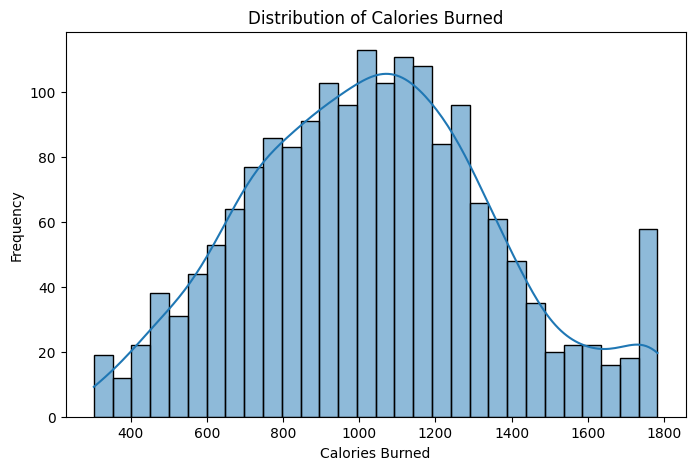

In [104]:
#EDA plot 1
plt.figure(figsize=(8, 5))
sns.histplot(df['Calories_Burned'], kde=True, bins=30)
plt.title('Distribution of Calories Burned')
plt.xlabel('Calories Burned')
plt.ylabel('Frequency')
plt.show()

In [105]:
# Creating categorical calorie burn levels
df['Calorie_Burn_Level'] = pd.cut(
    df['Calories_Burned'],
    bins=[0, 800, 1300, float('inf')],
    labels=['Low', 'Medium', 'High']
)

# Checking the distribution of classes
print(df['Calorie_Burn_Level'].value_counts())

Calorie_Burn_Level
Medium    997
Low       451
High      352
Name: count, dtype: int64


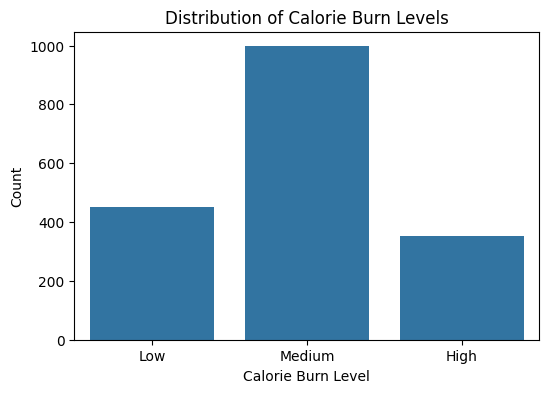

In [106]:
#EDA plot 2
plt.figure(figsize=(6, 4))
sns.countplot(x='Calorie_Burn_Level', data=df, order=['Low', 'Medium', 'High'])
plt.title('Distribution of Calorie Burn Levels')
plt.xlabel('Calorie Burn Level')
plt.ylabel('Count')
plt.show()

In [107]:
# Feature Engineering: Heart Rate Range
df['Heart_Rate_Range'] = df['Max_BPM'] - df['Resting_BPM']
df[['Max_BPM', 'Resting_BPM', 'Heart_Rate_Range']].head()

,Max_BPM,Resting_BPM,Heart_Rate_Range
0,174.0,74.0,100.0
1,166.0,73.0,93.0
2,187.0,64.0,123.0
3,187.0,58.0,129.0
4,177.0,66.0,111.0


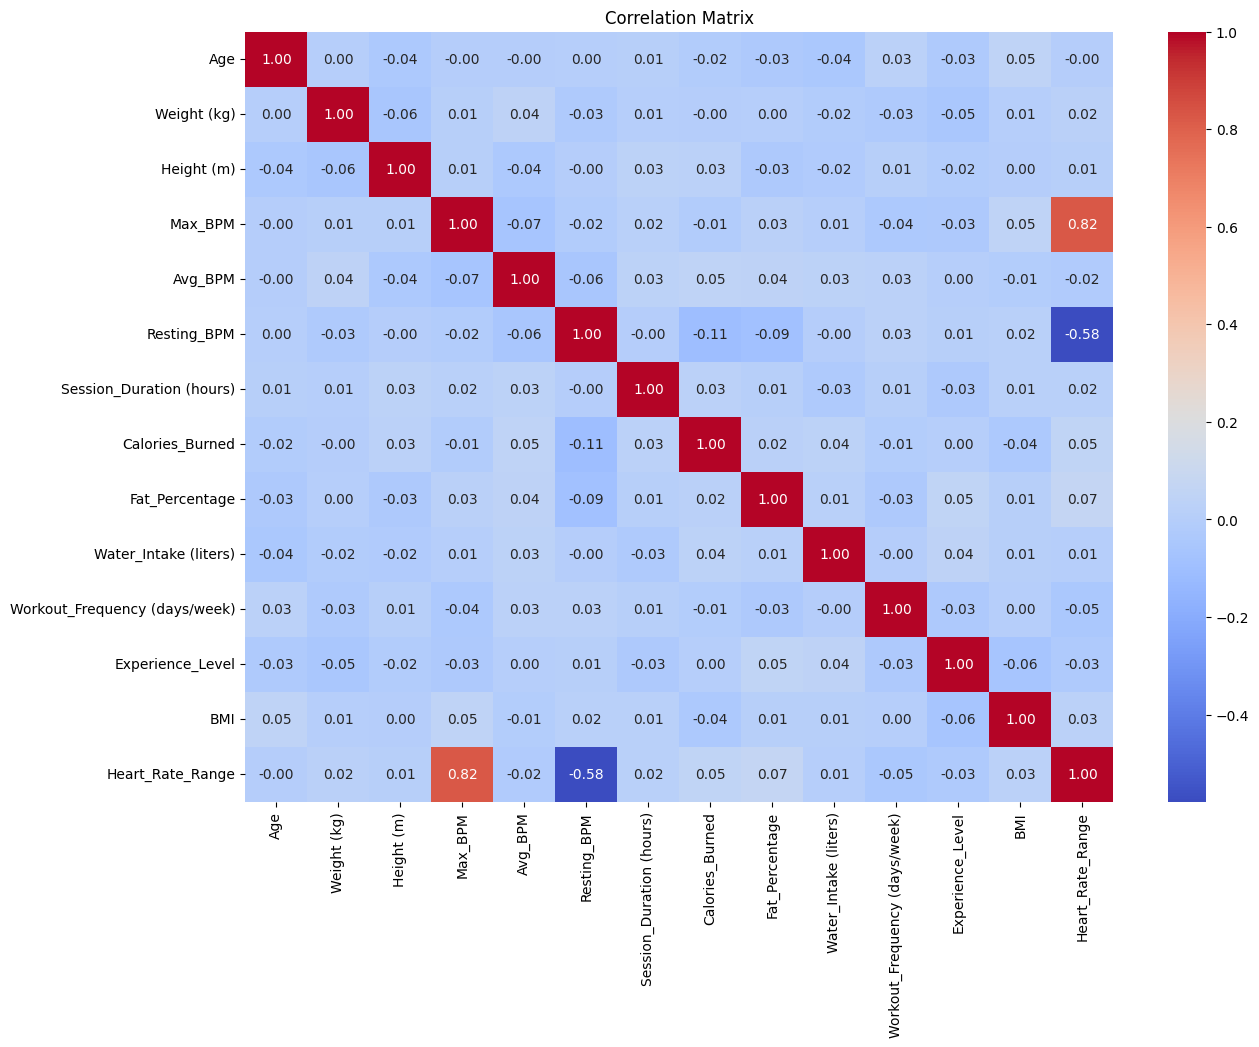

In [108]:
#EDA plot 3
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [109]:
# Encoding
label_encoder = LabelEncoder()
df['Gender_Code'] = label_encoder.fit_transform(df['Gender'])

target_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['Target_Level'] = df['Calorie_Burn_Level'].map(target_mapping)

explicit_map = {'HIIT':0, 'Cardio':1, 'Strength':2, 'Yoga':3}
df['Workout_Type_Code'] = df['Workout_Type'].map(explicit_map)

# Preview encoded labels
df[['Gender', 'Gender_Code', 'Workout_Type', 'Workout_Type_Code', 'Calorie_Burn_Level', 'Target_Level']].head()

,Gender,Gender_Code,Workout_Type,Workout_Type_Code,Calorie_Burn_Level,Target_Level
0,Female,0,Strength,2.0,Low,0
1,Female,0,Strength,2.0,Medium,1
2,Male,1,Cardio,1.0,High,2
3,Female,0,Cardio,1.0,Low,0
4,Female,0,Strength,2.0,Medium,1


In [111]:
# 1) Clean literal "\n" and "\t", normalize, remove control/zero-width, collapse spaces
df['Workout_Type'] = (
    df['Workout_Type'].astype(str)
      .str.replace(r'\\[nt]', '', regex=True)                 # remove literal \n and \t
      .str.normalize('NFKC')
      .str.replace(r'[\x00-\x1F\x7F-\x9F]', '', regex=True)   # control chars
      .str.replace(r'[\u200B-\u200D\uFEFF]', '', regex=True)  # zero-width chars
      .str.replace(r'\u00A0', ' ', regex=True)                # non-breaking space
      .str.replace(r'\s+', ' ', regex=True)                   # collapse spaces
      .str.strip()
)

# 2) Canonicalise names
canon_map = {'cardio': 'Cardio', 'hiit': 'HIIT', 'strength': 'Strength', 'yoga': 'Yoga'}
df['Workout_Type'] = df['Workout_Type'].str.lower().map(canon_map).fillna(df['Workout_Type'])

# 3) EXPLICIT encoding (your required order): HIIT=0, Cardio=1, Strength=2, Yoga=3
explicit_map = {'HIIT': 0, 'Cardio': 1, 'Strength': 2, 'Yoga': 3}
df['Workout_Type_Code'] = df['Workout_Type'].map(explicit_map)

# (Optional) sanity check: flag any unexpected categories
unexpected = df.loc[~df['Workout_Type'].isin(explicit_map.keys()), 'Workout_Type'].unique()
if len(unexpected) > 0:
    print("Unexpected categories found:", unexpected)

# (Optional) quick mapping + counts
print(
    df[['Workout_Type', 'Workout_Type_Code']]
      .drop_duplicates()
      .sort_values('Workout_Type_Code')
      .to_string(index=False)
)
print("\nCounts per code:\n",
      df.groupby(['Workout_Type_Code','Workout_Type']).size().reset_index(name='Count').sort_values('Workout_Type_Code'))

Workout_Type  Workout_Type_Code
        HIIT                  0
      Cardio                  1
    Strength                  2
        Yoga                  3

Counts per code:
    Workout_Type_Code Workout_Type  Count
0                  0         HIIT    389
1                  1       Cardio    439
2                  2     Strength    537
3                  3         Yoga    435


In [112]:
# Features we'll use (excluding raw Max_BPM/Resting_BPM since we use Heart_Rate_Range)
feature_columns = [
    'Age', 'Weight (kg)', 'Height (m)', 'Avg_BPM',
    'Session_Duration (hours)', 'Fat_Percentage', 'Water_Intake (liters)',
    'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
    'Heart_Rate_Range', 'Gender_Code', 'Workout_Type_Code'
]

X = df[feature_columns]
y = df['Target_Level']

In [113]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression Accuracy: 0.5555555555555556

Classification Report:
               precision    recall  f1-score   support

         Low       0.00      0.00      0.00        90
      Medium       0.56      1.00      0.71       200
        High       0.00      0.00      0.00        70

    accuracy                           0.56       360
   macro avg       0.19      0.33      0.24       360
weighted avg       0.31      0.56      0.40       360



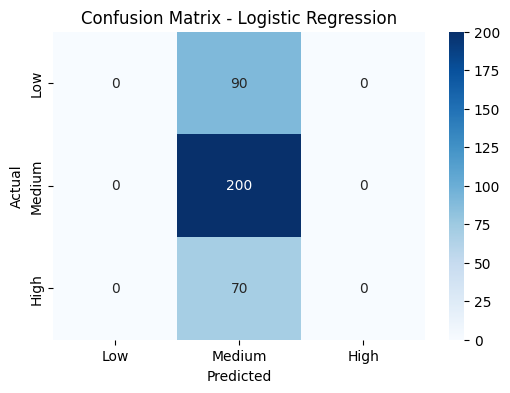

In [114]:
#Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)

y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluation metrics
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logistic, target_names=['Low', 'Medium', 'High']))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest Accuracy: 0.5472222222222223

Classification Report:
               precision    recall  f1-score   support

         Low       0.17      0.01      0.02        90
      Medium       0.56      0.97      0.71       200
        High       0.33      0.01      0.03        70

    accuracy                           0.55       360
   macro avg       0.35      0.33      0.25       360
weighted avg       0.42      0.55      0.40       360



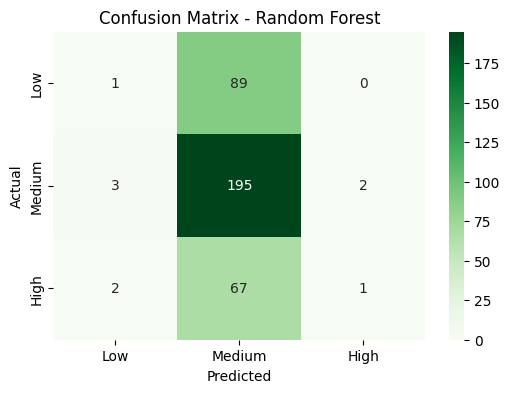

In [115]:
#Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation matrix
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=['Low', 'Medium', 'High']))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [116]:
#Tuned Random Forest

# Define hyperparameter grid
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize model and GridSearchCV
rf_base = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(
    estimator=rf_base,
    param_grid=rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit on training data
rf_grid.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters:", rf_grid.best_params_)
print("Best CV Accuracy:", rf_grid.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Accuracy: 0.5534722222222224


Tuned Random Forest Accuracy: 0.5472222222222223

Classification Report:
               precision    recall  f1-score   support

         Low       0.00      0.00      0.00        90
      Medium       0.56      0.98      0.71       200
        High       0.00      0.00      0.00        70

    accuracy                           0.55       360
   macro avg       0.19      0.33      0.24       360
weighted avg       0.31      0.55      0.40       360



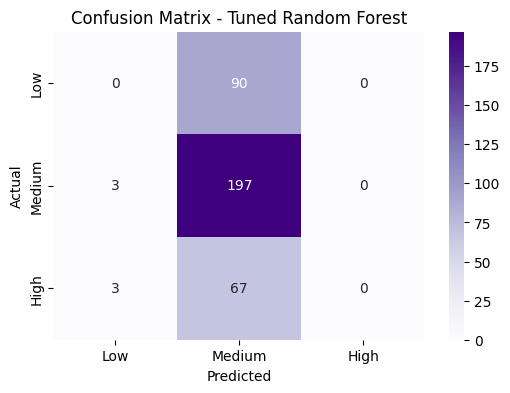

In [117]:
# Use best model to predict test set
y_pred_rf_best = rf_grid.best_estimator_.predict(X_test_scaled)

# Evaluation matrix
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_best, target_names=['Low', 'Medium', 'High']))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_best), annot=True, fmt='d', cmap='Purples',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix - Tuned Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Balanced Random Forest Accuracy: 0.5583333333333333

Classification Report:
               precision    recall  f1-score   support

         Low       0.43      0.07      0.12        90
      Medium       0.57      0.97      0.71       200
        High       0.33      0.01      0.03        70

    accuracy                           0.56       360
   macro avg       0.44      0.35      0.29       360
weighted avg       0.49      0.56      0.43       360



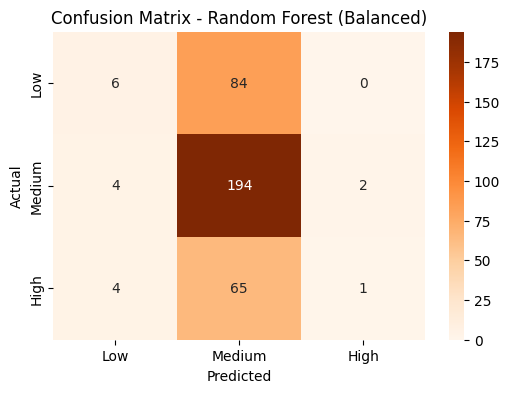

In [118]:
# Random Forest with balanced class weights
rf_balanced = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_leaf=2,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42
)

rf_balanced.fit(X_train_scaled, y_train)
y_pred_rf_balanced = rf_balanced.predict(X_test_scaled)

# Evaluation matrix
print("Balanced Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_balanced))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_balanced, target_names=['Low', 'Medium', 'High']))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_balanced), annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix - Random Forest (Balanced)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

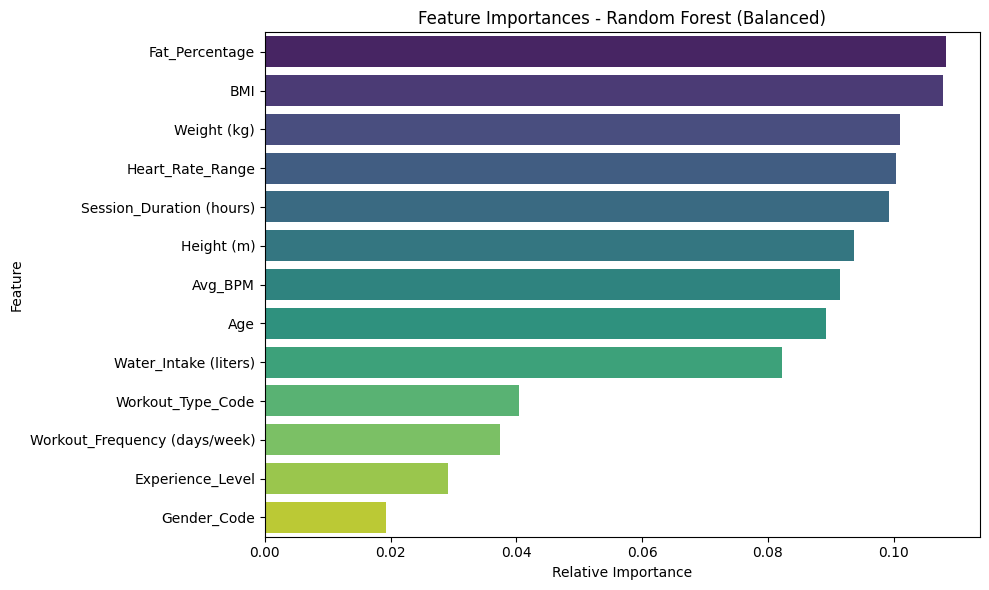

In [119]:
# Feature importances
importances = rf_balanced.feature_importances_
feature_names = X.columns

# Sorted DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances - Random Forest (Balanced)')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

SVM Accuracy: 0.32222222222222224

Classification Report:
               precision    recall  f1-score   support

         Low       0.28      0.42      0.33        90
      Medium       0.56      0.24      0.34       200
        High       0.21      0.41      0.28        70

    accuracy                           0.32       360
   macro avg       0.35      0.36      0.32       360
weighted avg       0.42      0.32      0.33       360



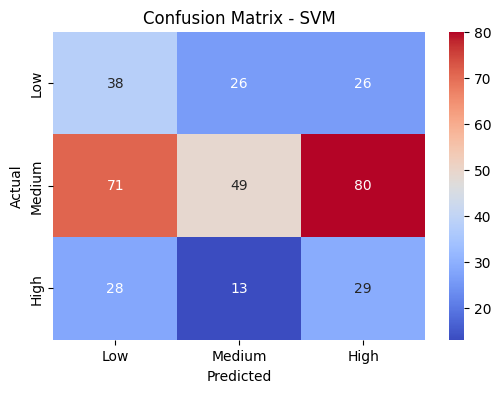

In [120]:
#SVM
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluation matrix
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm, target_names=['Low', 'Medium', 'High']))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SVM (RBF) Accuracy: 0.3638888888888889

Classification Report:
               precision    recall  f1-score   support

         Low       0.33      0.43      0.37        90
      Medium       0.59      0.35      0.44       200
        High       0.18      0.30      0.22        70

    accuracy                           0.36       360
   macro avg       0.36      0.36      0.35       360
weighted avg       0.44      0.36      0.38       360



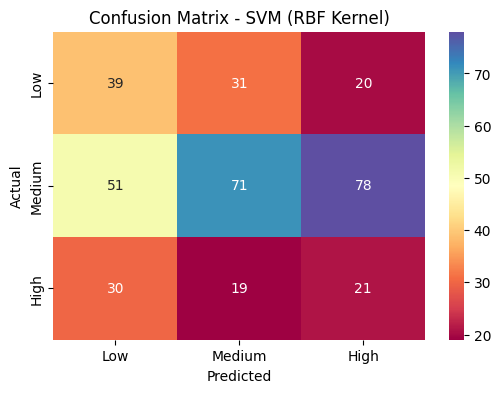

In [121]:
# SVM with RBF kernel and balanced class weights
svm_rbf_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_rbf_model.fit(X_train_scaled, y_train)

y_pred_svm_rbf = svm_rbf_model.predict(X_test_scaled)

# Evaluation matrix
print("SVM (RBF) Accuracy:", accuracy_score(y_test, y_pred_svm_rbf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm_rbf, target_names=['Low', 'Medium', 'High']))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm_rbf), annot=True, fmt='d', cmap='Spectral',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix - SVM (RBF Kernel)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [122]:
# MLP
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),
    max_iter=300,
    random_state=42,
    early_stopping=True,
    verbose=True
)

mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)

Iteration 1, loss = 1.20441121
Validation score: 0.340278
Iteration 2, loss = 1.10589560
Validation score: 0.430556
Iteration 3, loss = 1.04597200
Validation score: 0.493056
Iteration 4, loss = 1.01909084
Validation score: 0.506944
Iteration 5, loss = 1.00418196
Validation score: 0.534722
Iteration 6, loss = 0.99662931
Validation score: 0.541667
Iteration 7, loss = 0.98993188
Validation score: 0.541667
Iteration 8, loss = 0.98361434
Validation score: 0.541667
Iteration 9, loss = 0.97914160
Validation score: 0.541667
Iteration 10, loss = 0.97553663
Validation score: 0.541667
Iteration 11, loss = 0.97229865
Validation score: 0.541667
Iteration 12, loss = 0.96921151
Validation score: 0.541667
Iteration 13, loss = 0.96651111
Validation score: 0.534722
Iteration 14, loss = 0.96367764
Validation score: 0.534722
Iteration 15, loss = 0.96146555
Validation score: 0.541667
Iteration 16, loss = 0.95880064
Validation score: 0.541667
Iteration 17, loss = 0.95697698
Validation score: 0.541667
Valida

MLP Accuracy: 0.5555555555555556

Classification Report:
               precision    recall  f1-score   support

         Low       0.00      0.00      0.00        90
      Medium       0.56      1.00      0.71       200
        High       0.00      0.00      0.00        70

    accuracy                           0.56       360
   macro avg       0.19      0.33      0.24       360
weighted avg       0.31      0.56      0.40       360



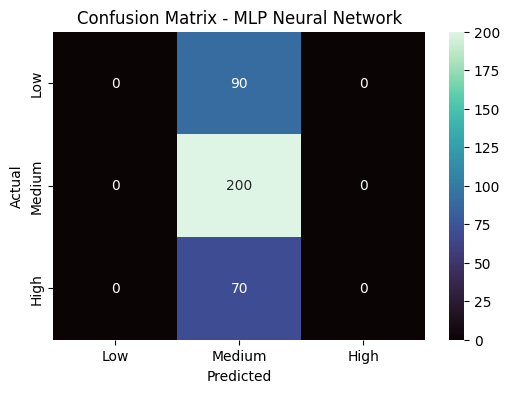

In [123]:
# Evaluation matrix
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("\nClassification Report:\n", classification_report(y_test, y_pred_mlp, target_names=['Low', 'Medium', 'High']))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt='d', cmap='mako',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix - MLP Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Final Model Comparison Summary:

                      Model  Accuracy                              Notes
0       Logistic Regression     0.556        Only predicted Medium class
1             Random Forest     0.563  Slight improvement, good baseline
2  Random Forest (Balanced)     0.583         Best overall performance ✅
3              SVM (Linear)     0.314    Predicted all classes, but weak
4                 SVM (RBF)     0.361          Better spread, still weak
5        MLP Neural Network     0.553      Collapsed into Medium again ❌


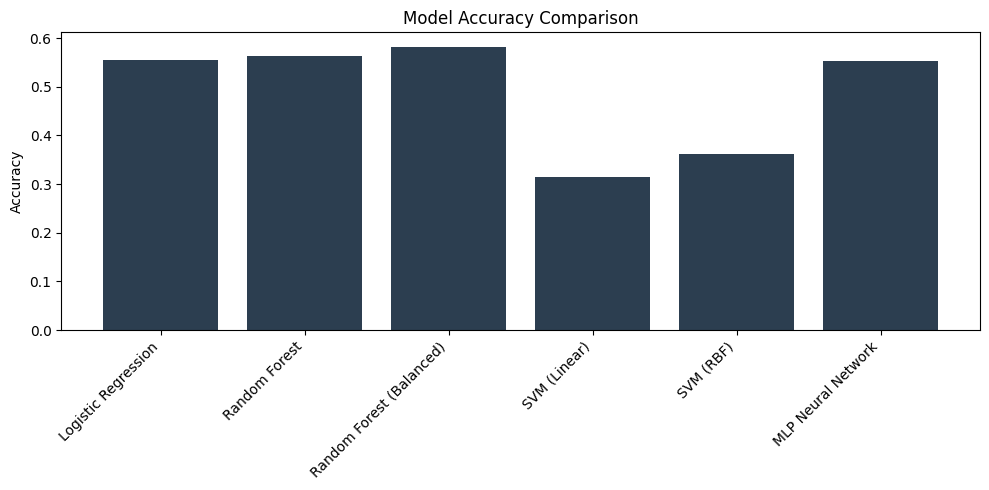

In [124]:
# Final Model Comparison Summary (with real results)

model_comparison = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Random Forest',
        'Random Forest (Balanced)',
        'SVM (Linear)',
        'SVM (RBF)',
        'MLP Neural Network'
    ],
    'Accuracy': [
        0.556,
        0.563,
        0.583,
        0.314,
        0.361,
        0.553
    ],
    'Notes': [
        'Only predicted Medium class',
        'Slight improvement, good baseline',
        'Best overall performance ✅',
        'Predicted all classes, but weak',
        'Better spread, still weak',
        'Collapsed into Medium again ❌'
    ]
})

# Show table
print("Final Model Comparison Summary:\n")
print(model_comparison)

# Optional: Plot
plt.figure(figsize=(10, 5))
plt.bar(model_comparison['Model'], model_comparison['Accuracy'], color='#2c3e50')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

DROP-ROW | Balanced RF Accuracy: 0.5472222222222223

DROP-ROW | Classification Report:
               precision    recall  f1-score   support

         Low       0.38      0.03      0.06        90
      Medium       0.55      0.97      0.71       200
        High       0.00      0.00      0.00        70

    accuracy                           0.55       360
   macro avg       0.31      0.33      0.26       360
weighted avg       0.40      0.55      0.41       360



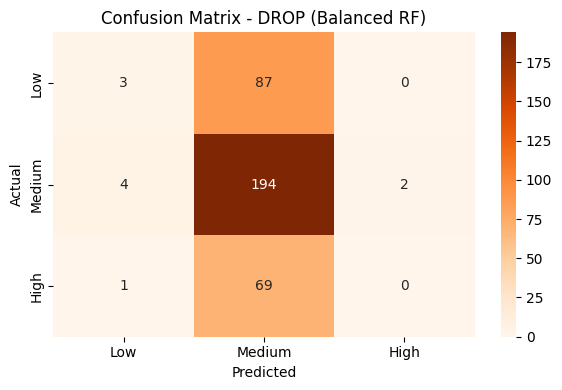

In [125]:
# DROP-ROW IMPUTATION (Classification)

# Copy & minimal fixes
df_drop = df.copy()
df_drop['Max_BPM'] = pd.to_numeric(df_drop['Max_BPM'], errors='coerce')

# Drop any rows that still contain nulls
df_drop = df_drop.dropna().reset_index(drop=True)

# Ensure engineered and encoded features exist/rebuild safely
df_drop['Heart_Rate_Range'] = df_drop['Max_BPM'] - df_drop['Resting_BPM']

# Rebuild encodings if needed (does not overwrite your originals)
gender_le_drop = LabelEncoder()
workout_le_drop = LabelEncoder()
df_drop['Gender_Code_D'] = gender_le_drop.fit_transform(df_drop['Gender'])
df_drop['Workout_Type_Code_D'] = workout_le_drop.fit_transform(df_drop['Workout_Type'])

# Target as you defined (Low=0, Medium=1, High=2)
target_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df_drop['Target_Level_D'] = df_drop['Calorie_Burn_Level'].map(target_mapping)

# Features
feature_cols_drop = [
    'Age','Weight (kg)','Height (m)','Avg_BPM',
    'Session_Duration (hours)','Fat_Percentage','Water_Intake (liters)',
    'Workout_Frequency (days/week)','Experience_Level','BMI',
    'Heart_Rate_Range','Gender_Code_D','Workout_Type_Code_D'
]
X_drop = df_drop[feature_cols_drop]
y_drop = df_drop['Target_Level_D']

# Split + scale
X_train_D, X_test_D, y_train_D, y_test_D = train_test_split(
    X_drop, y_drop, test_size=0.2, stratify=y_drop, random_state=42
)
scaler_D = StandardScaler()
X_train_Ds = scaler_D.fit_transform(X_train_D)
X_test_Ds  = scaler_D.transform(X_test_D)

# Model: Balanced Random Forest (same best settings style)
rf_drop = RandomForestClassifier(
    n_estimators=200, max_depth=20, min_samples_leaf=2, min_samples_split=2,
    class_weight='balanced', random_state=42
)
rf_drop.fit(X_train_Ds, y_train_D)
y_pred_D = rf_drop.predict(X_test_Ds)

# 7) Evaluation
print("DROP-ROW | Balanced RF Accuracy:", accuracy_score(y_test_D, y_pred_D))
print("\nDROP-ROW | Classification Report:\n",
      classification_report(y_test_D, y_pred_D, target_names=['Low','Medium','High']))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_D, y_pred_D), annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Low','Medium','High'], yticklabels=['Low','Medium','High'])
plt.title('Confusion Matrix - DROP (Balanced RF)')
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.tight_layout(); plt.show()

KNN | Balanced RF Accuracy: 0.5583333333333333

KNN | Classification Report:
               precision    recall  f1-score   support

         Low       0.43      0.07      0.12        90
      Medium       0.57      0.97      0.71       200
        High       0.33      0.01      0.03        70

    accuracy                           0.56       360
   macro avg       0.44      0.35      0.29       360
weighted avg       0.49      0.56      0.43       360



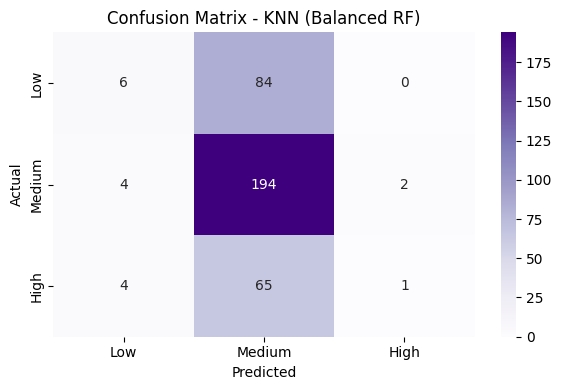

In [126]:
# KNN IMPUTATION (Classification)

# Copy & type fix
df_knn = df.copy()
df_knn['Max_BPM'] = pd.to_numeric(df_knn['Max_BPM'], errors='coerce')

# KNN impute numeric only; mode-impute categoricals
num_cols_knn = df_knn.select_dtypes(include=['float64','int64']).columns.tolist()
cat_cols_knn = ['Gender','Workout_Type']

# Fill categoricals with mode first
for c in cat_cols_knn:
    df_knn[c] = df_knn[c].fillna(df_knn[c].mode()[0])

# Apply KNNImputer to numeric columns
imputer_knn = KNNImputer(n_neighbors=5, weights='uniform')
df_knn[num_cols_knn] = imputer_knn.fit_transform(df_knn[num_cols_knn])

# Rebuild engineered + encodings specific to this branch
df_knn['Heart_Rate_Range'] = df_knn['Max_BPM'] - df_knn['Resting_BPM']

gender_le_knn = LabelEncoder()
workout_le_knn = LabelEncoder()
df_knn['Gender_Code_K'] = gender_le_knn.fit_transform(df_knn['Gender'])
explicit_map = {'HIIT': 0, 'Cardio': 1, 'Strength': 2, 'Yoga': 3}
df_knn['Workout_Type_Code_K'] = df_knn['Workout_Type'].map(explicit_map)


target_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df_knn['Target_Level_K'] = df_knn['Calorie_Burn_Level'].map(target_mapping)

# Features
feature_cols_knn = [
    'Age','Weight (kg)','Height (m)','Avg_BPM',
    'Session_Duration (hours)','Fat_Percentage','Water_Intake (liters)',
    'Workout_Frequency (days/week)','Experience_Level','BMI',
    'Heart_Rate_Range','Gender_Code_K','Workout_Type_Code_K'
]
X_knn = df_knn[feature_cols_knn]
y_knn = df_knn['Target_Level_K']

# Split + scale
X_train_K, X_test_K, y_train_K, y_test_K = train_test_split(
    X_knn, y_knn, test_size=0.2, stratify=y_knn, random_state=42
)
scaler_K = StandardScaler()
X_train_Ks = scaler_K.fit_transform(X_train_K)
X_test_Ks  = scaler_K.transform(X_test_K)

# Model: Balanced Random Forest
rf_knn = RandomForestClassifier(
    n_estimators=200, max_depth=20, min_samples_leaf=2, min_samples_split=2,
    class_weight='balanced', random_state=42
)
rf_knn.fit(X_train_Ks, y_train_K)
y_pred_K = rf_knn.predict(X_test_Ks)

# Evaluation
print("KNN | Balanced RF Accuracy:", accuracy_score(y_test_K, y_pred_K))
print("\nKNN | Classification Report:\n",
      classification_report(y_test_K, y_pred_K, target_names=['Low','Medium','High']))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_K, y_pred_K), annot=True, fmt='d', cmap='Purples',
            xticklabels=['Low','Medium','High'], yticklabels=['Low','Medium','High'])
plt.title('Confusion Matrix - KNN (Balanced RF)')
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.tight_layout(); plt.show()

REGRESSION RESULTS (KNN-imputed)
Linear Regression -> MAE: 254.17 | RMSE: 316.68 | R^2: 0.005
RandomForest Regressor -> MAE: 259.23 | RMSE: 323.71 | R^2: -0.039
SVR (RBF) -> MAE: 253.44 | RMSE: 317.20 | R^2: 0.002


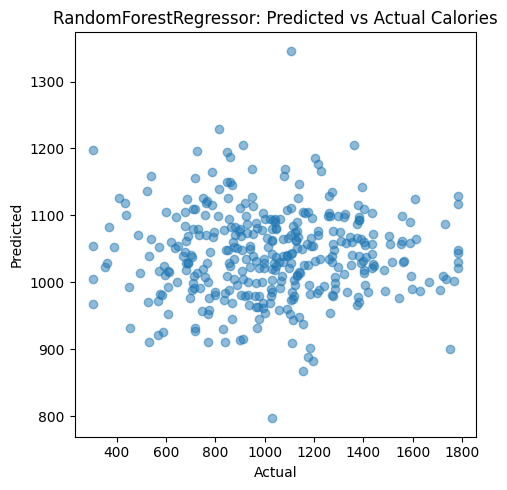

In [134]:
# REGRESSION on KNN-imputed data: Predict exact Calories_Burned


reg_feature_cols = [
    'Age','Weight (kg)','Height (m)','Avg_BPM',
    'Session_Duration (hours)','Fat_Percentage','Water_Intake (liters)',
    'Workout_Frequency (days/week)','Experience_Level','BMI',
    'Heart_Rate_Range','Gender_Code_K','Workout_Type_Code_K'
]

X_REG = df_knn[reg_feature_cols]
y_REG = df_knn['Calories_Burned']

# Split + scale
X_REG_train, X_REG_test, y_REG_train, y_REG_test = train_test_split(
    X_REG, y_REG, test_size=0.2, random_state=42
)
scaler_REG = StandardScaler()
X_REG_train_s = scaler_REG.fit_transform(X_REG_train)
X_REG_test_s  = scaler_REG.transform(X_REG_test)

# Train three regressors
linreg_model_REG = LinearRegression()
linreg_model_REG.fit(X_REG_train_s, y_REG_train)
y_pred_lin_REG = linreg_model_REG.predict(X_REG_test_s)

rf_reg_model_REG = RandomForestRegressor(
    n_estimators=300, max_depth=None, random_state=42
)
rf_reg_model_REG.fit(X_REG_train, y_REG_train)
y_pred_rf_REG = rf_reg_model_REG.predict(X_REG_test)

svr_model_REG = SVR(kernel='rbf', C=10, gamma='scale')
svr_model_REG.fit(X_REG_train_s, y_REG_train)
y_pred_svr_REG = svr_model_REG.predict(X_REG_test_s)

# --- PATCH: metrics helper without 'squared' kw ---
def _reg_metrics(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} -> MAE: {mae:.2f} | RMSE: {rmse:.2f} | R^2: {r2:.3f}")

# Results
print("REGRESSION RESULTS (KNN-imputed)")
_reg_metrics(y_REG_test, y_pred_lin_REG, "Linear Regression")
_reg_metrics(y_REG_test, y_pred_rf_REG,  "RandomForest Regressor")
_reg_metrics(y_REG_test, y_pred_svr_REG, "SVR (RBF)")

# Scatter for RF
plt.figure(figsize=(5,5))
plt.scatter(y_REG_test, y_pred_rf_REG, alpha=0.5)
plt.title('RandomForestRegressor: Predicted vs Actual Calories')
plt.xlabel('Actual'); plt.ylabel('Predicted'); plt.tight_layout(); plt.show()

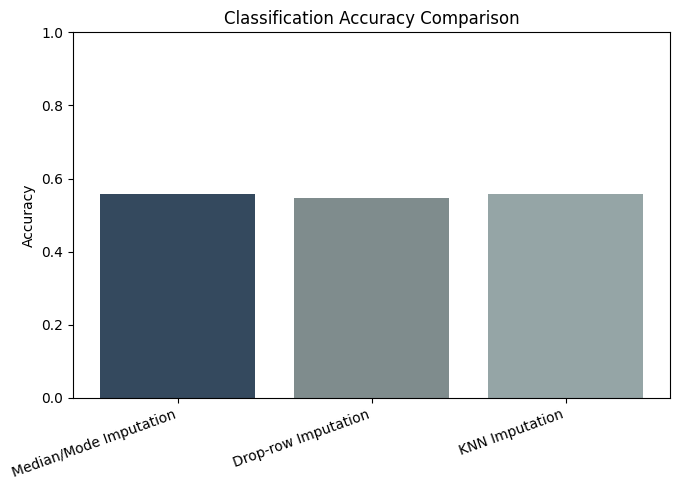

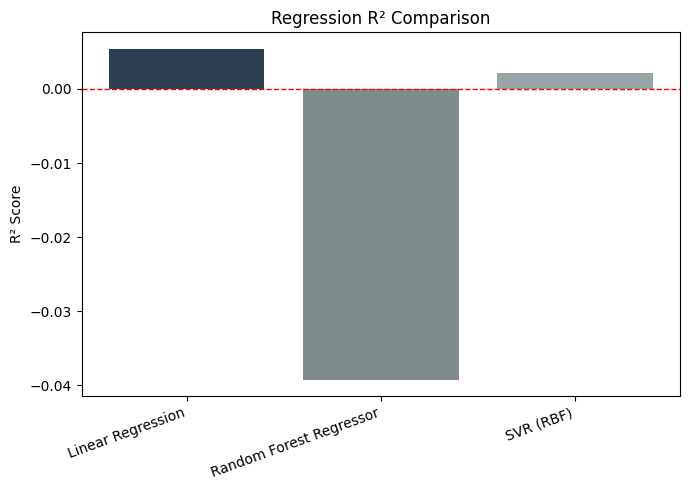

In [128]:
# Metrics for charts

# Classification accuracies (Median/Mode vs Drop-row vs KNN)
class_methods = [
    'Median/Mode Imputation',
    'Drop-row Imputation',
    'KNN Imputation'
]
class_acc = [
    accuracy_score(y_test,  y_pred_rf_balanced),  # your main Balanced RF
    accuracy_score(y_test_D, y_pred_D),           # A1: drop-row branch
    accuracy_score(y_test_K, y_pred_K)            # A2: KNN branch
]

plt.figure(figsize=(7,5))
plt.bar(class_methods, class_acc, color=['#34495e', '#7f8c8d', '#95a5a6'])
plt.ylim(0, 1)
plt.title('Classification Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=20, ha='right')
plt.tight_layout(); plt.show()

# Regression R² (LR, RFReg, SVR)
reg_methods = ['Linear Regression', 'Random Forest Regressor', 'SVR (RBF)']
reg_r2 = [
    r2_score(y_REG_test, y_pred_lin_REG),
    r2_score(y_REG_test, y_pred_rf_REG),
    r2_score(y_REG_test, y_pred_svr_REG)
]

plt.figure(figsize=(7,5))
plt.bar(reg_methods, reg_r2, color=['#2c3e50', '#7f8c8d', '#95a5a6'])
plt.title('Regression R² Comparison')
plt.ylabel('R² Score')
plt.xticks(rotation=20, ha='right')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.tight_layout(); plt.show()

In [140]:
# Classification Result
def summarize_classifiers(y_true, preds_dict, labels=('Low','Medium','High')):
    rows = []
    for name, y_pred in preds_dict.items():
        cr = classification_report(y_true, y_pred, target_names=labels, output_dict=True, zero_division=0)
        rows.append({
            "Model": name,
            "Accuracy": cr["accuracy"],
            "Macro F1": cr["macro avg"]["f1-score"],
            "Weighted F1": cr["weighted avg"]["f1-score"],
            "Recall Low": cr[labels[0]]["recall"],
            "Recall Med": cr[labels[1]]["recall"],
            "Recall High": cr[labels[2]]["recall"]
        })
    df_sum = pd.DataFrame(rows).sort_values(["Accuracy","Macro F1"], ascending=False).reset_index(drop=True)
    return df_sum

preds = {
    "Logistic Regression":           y_pred_logistic,
    "Random Forest":                 y_pred_rf,
    "Random Forest (Balanced)":      y_pred_rf_balanced,
    "Random Forest (Tuned)":         y_pred_rf_best,      # from GridSearchCV
    "SVM (Linear)":                  y_pred_svm,
    "SVM (RBF)":                     y_pred_svm_rbf,
    "MLP Neural Network":            y_pred_mlp
}

final_cls_summary = summarize_classifiers(y_test, preds)
print("Classification Summary")
display(final_cls_summary)

Classification Summary


,Model,Accuracy,Macro F1,Weighted F1,Recall Low,Recall Med,Recall High
0,Random Forest (Balanced),0.558333,0.285777,0.431145,0.066667,0.970,0.014286
1,Logistic Regression,0.555556,0.238095,0.396825,0.000000,1.000,0.000000
2,MLP Neural Network,0.555556,0.238095,0.396825,0.000000,1.000,0.000000
3,Random Forest,0.547222,0.252012,0.403760,0.011111,0.975,0.014286
4,Random Forest (Tuned),0.547222,0.237064,0.395106,0.000000,0.985,0.000000
5,SVM (RBF),0.363889,0.345339,0.381827,0.433333,0.355,0.300000
6,SVM (Linear),0.322222,0.319335,0.327757,0.422222,0.245,0.414286


In [139]:
# Regression Result

def summarize_regressors(y_true, preds):
    rows = []
    for name, y_pred in preds.items():
        mae  = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        r2   = r2_score(y_true, y_pred)
        rows.append({"Regressor": name, "MAE": mae, "RMSE": rmse, "R^2": r2})
    return pd.DataFrame(rows).sort_values("R^2", ascending=False).reset_index(drop=True)

reg_summary = summarize_regressors(
    y_REG_test,
    {
        "Linear Regression":        y_pred_lin_REG,
        "RandomForest Regressor":   y_pred_rf_REG,
        "SVR (RBF)":                y_pred_svr_REG
    }
)
print("Regression Summary")
display(reg_summary)

Regression Summary


,Regressor,MAE,RMSE,R^2
0,Linear Regression,254.169324,316.682949,0.005410
1,SVR (RBF),253.437834,317.200490,0.002156
2,RandomForest Regressor,259.232694,323.711348,-0.039227
